In [2]:
from corpora.corpus import *

In [3]:
data = load_pickle("./enron_mail_clean2.pkl") # takes a while (~3-4 min)
corpus = Corpus(documents = data['tokens'], metadata = data['metadata'])

In [13]:
corpus.load_dictionary("./data/full/corpus_dic.dat")

In [17]:
corpus.load_dictionary("./data/full/corpus_dic.dat")
c_matrix = corpus.sparse_matrix() # takes a while ~3min

In [19]:
print("nSamples (docs) : {0}".format(len(corpus._corpus)))
print("nFeatures(words): {0}".format(len(corpus.dic)))

nSamples (docs) : 517401
nFeatures(words): 169913


In [72]:
from sklearn.externals import joblib
lda_filename = "./data/full/lda_pickle_736.pkl"
lda = joblib.load(lda_filename)
corpus.lda = lda

In [73]:
topicsByOrg, orgs = topics_by_discrete_property(lda, corpus, corpus.metadata_frame['user']) # takes  ~2min

In [74]:
documents_filename = "./data/full/docs_by_user_10.pkl"
with open(documents_filename, 'r') as f:
        dd = pickle.load(f)

In [250]:
dd_sorted = sorted(dd.items(), key=lambda x:x[1]) 

Populating the interactive namespace from numpy and matplotlib


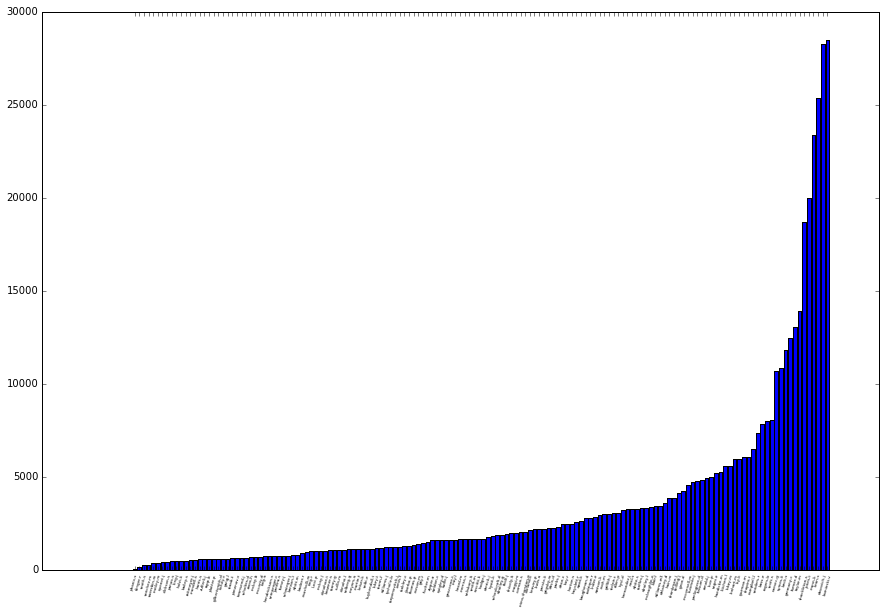

In [80]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
plt_bar = plt.bar(range(len(dd_sorted)),[el[1] for el in dd_sorted], align='center')
plt_xticks = plt.xticks(range(len(dd_sorted)), [el[0] for el in dd_sorted], rotation=75, size=4)

In [103]:
# print top N = 10 topics
topicWords, topicWeightedWords = topic_words(lda, corpus, num_words = 10)

Topic #0:
image free click new online e-mail email news service information
Topic #1:
enron please information business group new services contact houston management
Topic #2:
final schedule vince date start file operation hourahead log variances
Topic #3:
get know like would one week time good going don't
Topic #4:
would may agreement also issues need time credit one issue
Topic #5:
cc subject pm forwarded sara mark kate re john david
Topic #6:
energy power enron said company california million state new electricity
Topic #7:
gas deal trading power price market energy prices deals new
Topic #8:
pm scheduled database thru sat outages dbcaps97data london ct travel
Topic #9:
please thanks know attached subject let pm call cc enron


In [82]:
# nTopics = 10
img = []
for idx,topic in enumerate(topicWeightedWords):
    wc = WordCloud(background_color="white")
    img.append(wc.generate_from_frequencies([ (word, weight) for weight,word in topic ]))
#     subplot(nTopics,2,2*idx+1)
#     imshow(img)
#     axis('off')
#     imshow(img)

In [83]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

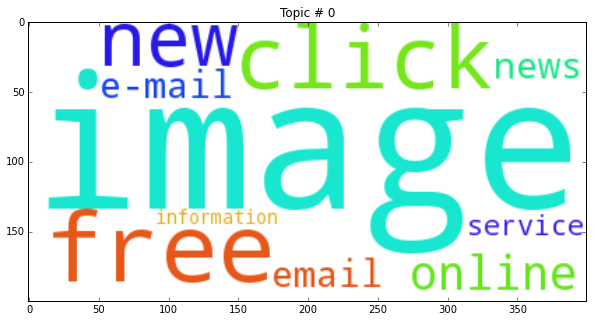

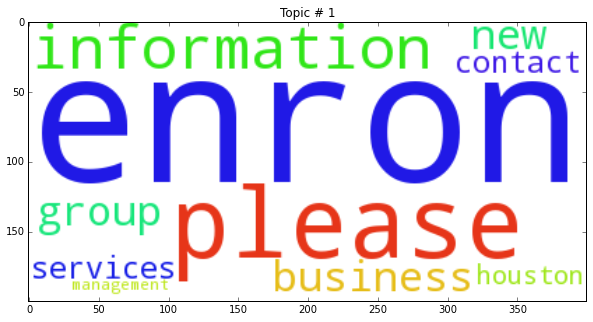

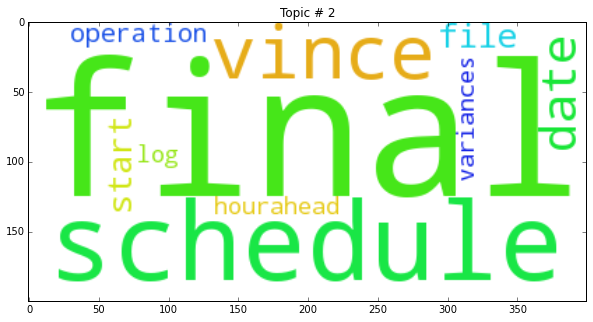

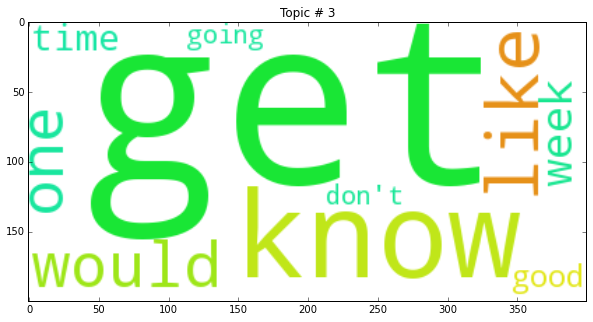

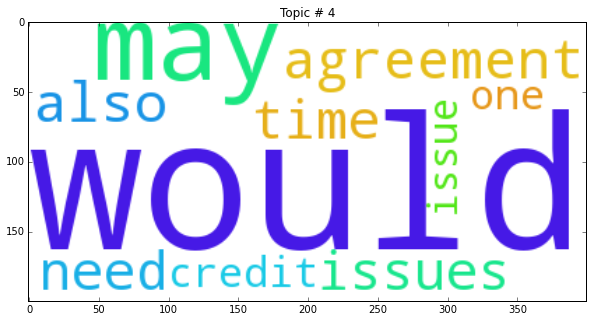

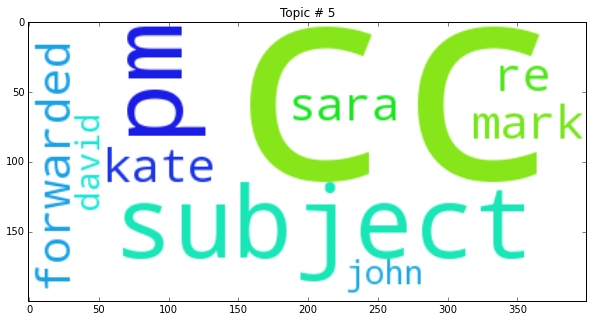

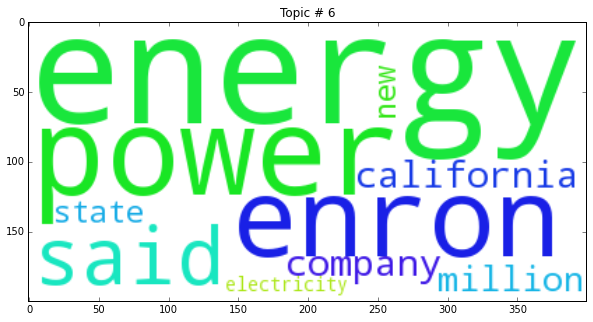

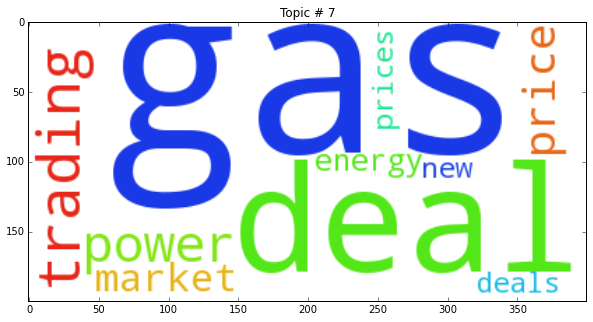

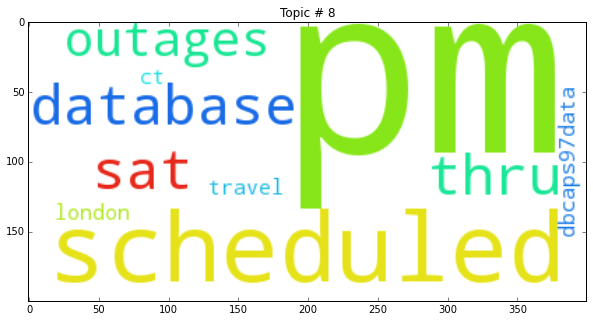

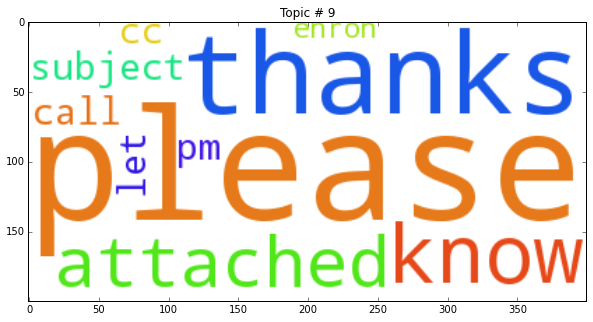

In [84]:
for idx, im in enumerate(img):
    figure(figsize=(10,5))
    title('Topic #%2d'%(idx))
    imshow(im)

In [85]:
dd_sorted.reverse()

In [86]:
dd_sorted_reverse = dd_sorted

In [91]:
dd_sorted_reverse_top20 = dd_sorted_reverse[:20]

Populating the interactive namespace from numpy and matplotlib


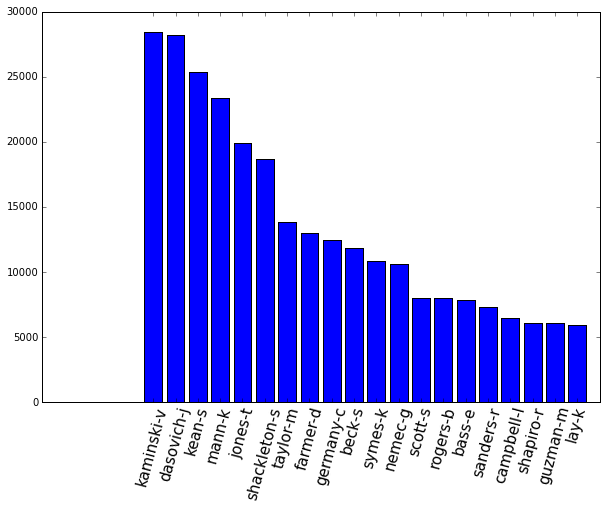

In [92]:
%pylab inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,7))
plt_bar = plt.bar(range(len(dd_sorted_reverse_top20)),[el[1] for el in dd_sorted_reverse_top20], align='center')
plt_xticks = plt.xticks(range(len(dd_sorted_reverse_top20)), [el[0] for el in dd_sorted_reverse_top20], rotation=75, size=15)

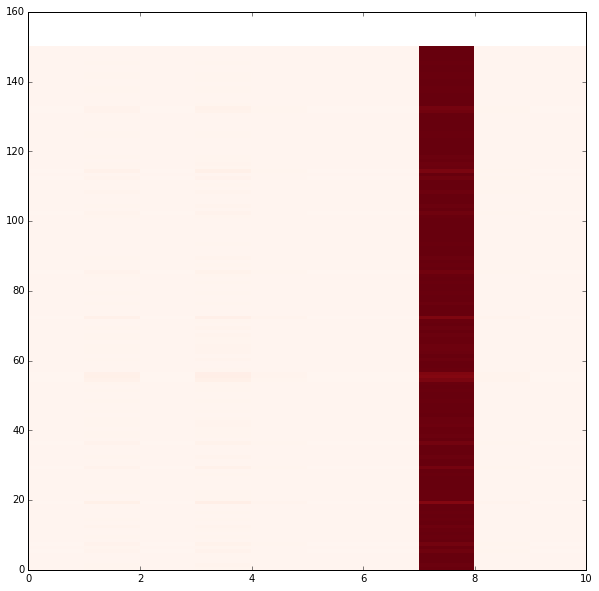

In [229]:
fig = plt.figure(figsize=(10,10))
plt.pcolor(topicsByOrg, cmap = plt.cm.Reds)
plt.show()

In [204]:
topics_exclude_highest = topicsByOrg[:,range(0,7)+range(8,10)]

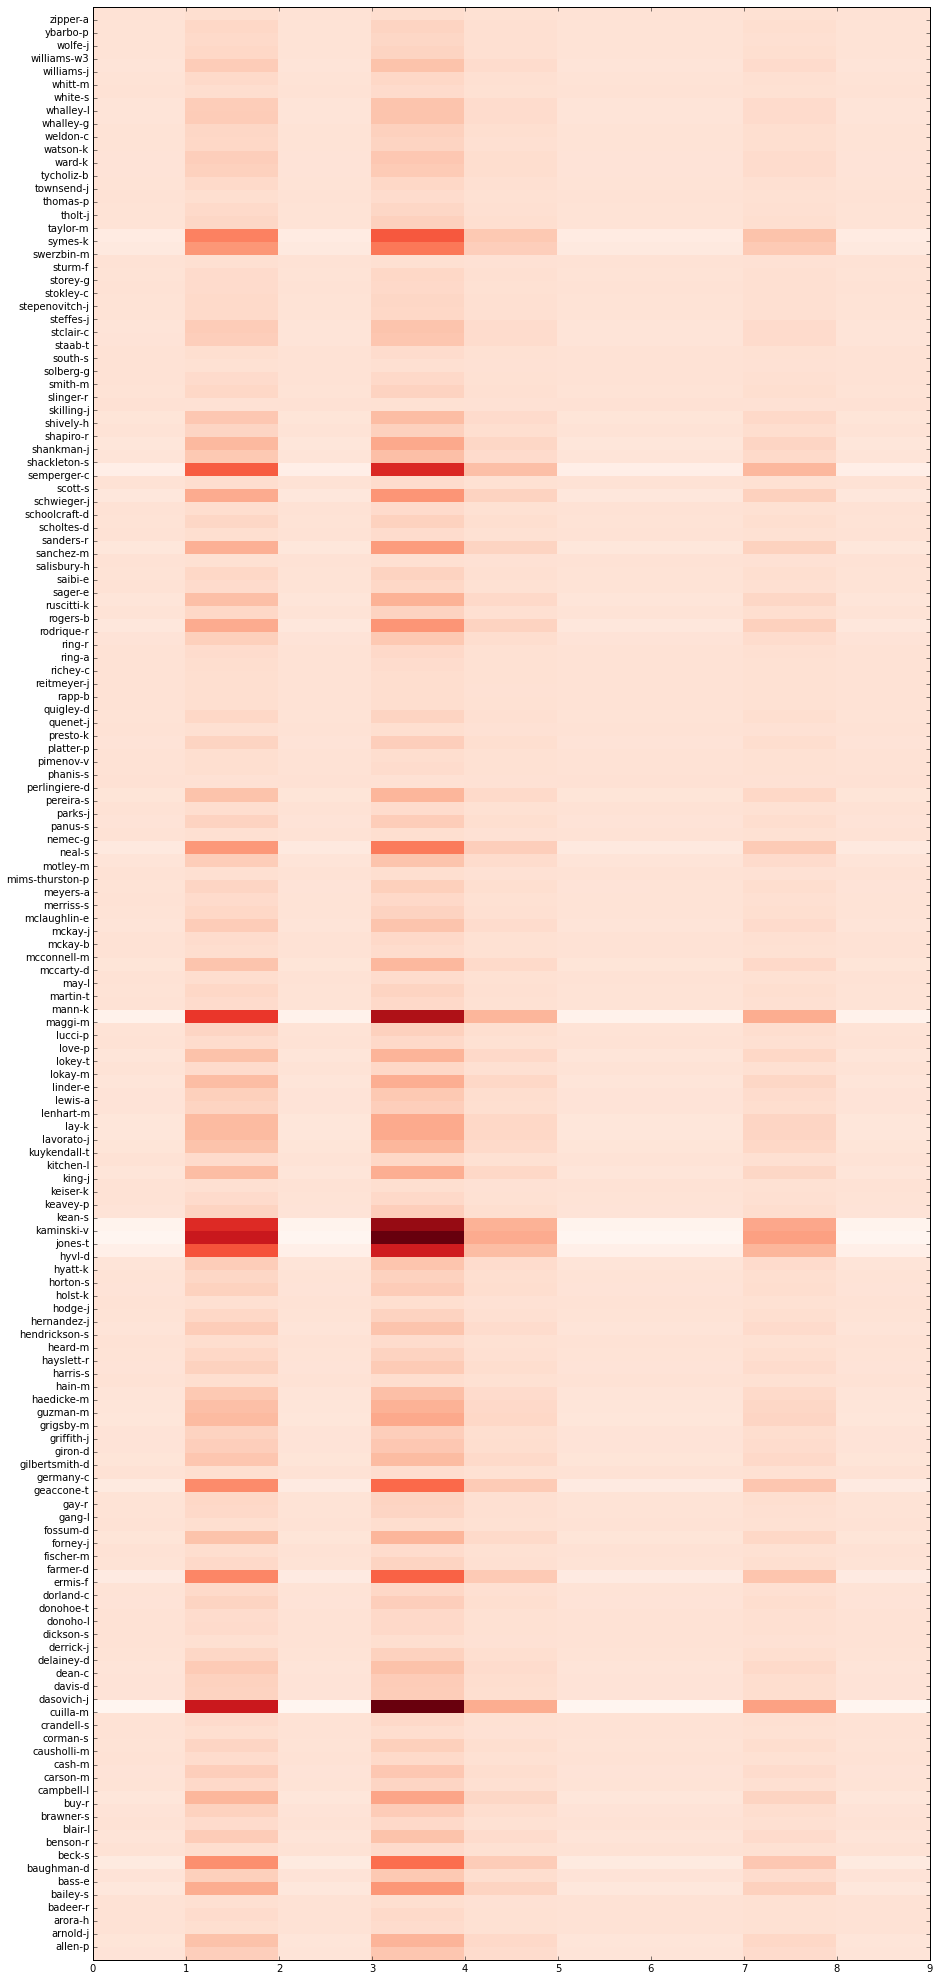

In [259]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 35)
ax.set_yticks(np.arange(topics_exclude_highest.shape[0]), minor=False)
heatmap = ax.pcolor(topics_exclude_highest, cmap = plt.cm.Reds)
ax.set_yticklabels(['']+column_labels, minor=False)
plt.show()